In [1]:
import os
import librosa
import numpy as np
from tqdm import tqdm
from PIL import Image

# Function to resize spectrogram to 128x128
def resize_spectrogram(spectrogram):
    img = Image.fromarray(spectrogram)
    img = img.resize((128, 128), Image.ANTIALIAS)
    return np.array(img)

# Function to extract STFT magnitude spectrograms
def extract_spectrograms(clean_folder, noisy_folder, window_length=255, fft_length=255, hop_length=63):
    clean_signal_stft_magnitude = []
    noisy_signal_stft_magnitude = []

    clean_files = os.listdir(clean_folder)
    noisy_files = os.listdir(noisy_folder)

    for clean_file, noisy_file in tqdm(zip(clean_files, noisy_files), desc="Extracting spectrograms", total=len(clean_files)):
        if clean_file.endswith(".wav") and noisy_file.endswith(".wav"):
            clean_filepath = os.path.join(clean_folder, clean_file)
            noisy_filepath = os.path.join(noisy_folder, noisy_file)

            # Load clean audio file
            clean_signal, sr = librosa.load(clean_filepath)
            # Load noisy audio file
            noisy_signal, _ = librosa.load(noisy_filepath, sr=sr)

            # Compute STFT for clean signal
            clean_stft = librosa.stft(clean_signal, n_fft=fft_length, hop_length=hop_length, win_length=window_length)
            clean_stft_mag = np.abs(clean_stft)
            # Convert to dB and scale
            clean_stft_mag_db = (librosa.amplitude_to_db(clean_stft_mag, ref=np.max) + 80) / 80
            clean_stft_mag_db_resized = resize_spectrogram(clean_stft_mag_db)
            clean_signal_stft_magnitude.append(clean_stft_mag_db_resized)

            # Compute STFT for noisy signal
            noisy_stft = librosa.stft(noisy_signal, n_fft=fft_length, hop_length=hop_length, win_length=window_length)
            noisy_stft_mag = np.abs(noisy_stft)
            # Convert to dB and scale
            noisy_stft_mag_db = (librosa.amplitude_to_db(noisy_stft_mag, ref=np.max) + 80) / 80
            noisy_stft_mag_db_resized = resize_spectrogram(noisy_stft_mag_db)
            noisy_signal_stft_magnitude.append(noisy_stft_mag_db_resized)

    # Convert lists to numpy arrays
    clean_signal_stft_magnitude = np.array(clean_signal_stft_magnitude)
    noisy_signal_stft_magnitude = np.array(noisy_signal_stft_magnitude)

    return clean_signal_stft_magnitude, noisy_signal_stft_magnitude


# Example usage:
clean_folder = r"C:\Users\admin\Desktop\ARTH SHAH\Hearing Aids\Wind_noise\Dataset\Train\clean\clean"
noisy_folder = r"C:\Users\admin\Desktop\ARTH SHAH\Hearing Aids\Wind_noise\Dataset\Train\noisy\noisy"
clean_spectrograms, noisy_spectrograms = extract_spectrograms(clean_folder, noisy_folder)
print("Clean Train spectrograms shape:", clean_spectrograms.shape)
print("Noisy Train spectrograms shape:", noisy_spectrograms.shape)


Extracting spectrograms:   0%|          | 0/10000 [00:00<?, ?it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_19268\3870497425.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((128, 128), Image.ANTIALIAS)
Extracting spectrograms: 100%|██████████| 10000/10000 [07:26<00:00, 22.38it/s]


Clean Train spectrograms shape: (10000, 128, 128)
Noisy Train spectrograms shape: (10000, 128, 128)


In [2]:
import os
import librosa
import numpy as np
from tqdm import tqdm
from PIL import Image

# Function to resize spectrogram to 128x128
def resize_spectrogram(spectrogram):
    img = Image.fromarray(spectrogram)
    img = img.resize((128, 128), Image.ANTIALIAS)
    return np.array(img)

# Function to extract STFT magnitude spectrograms
def extract_spectrograms(clean_folder, noisy_folder, window_length=255, fft_length=255, hop_length=63):
    clean_signal_stft_magnitude = []
    noisy_signal_stft_magnitude = []

    clean_files = os.listdir(clean_folder)
    noisy_files = os.listdir(noisy_folder)

    for clean_file, noisy_file in tqdm(zip(clean_files, noisy_files), desc="Extracting spectrograms", total=len(clean_files)):
        if clean_file.endswith(".wav") and noisy_file.endswith(".wav"):
            clean_filepath = os.path.join(clean_folder, clean_file)
            noisy_filepath = os.path.join(noisy_folder, noisy_file)

            # Load clean audio file
            clean_signal, sr = librosa.load(clean_filepath)
            # Load noisy audio file
            noisy_signal, _ = librosa.load(noisy_filepath, sr=sr)

            # Compute STFT for clean signal
            clean_stft = librosa.stft(clean_signal, n_fft=fft_length, hop_length=hop_length, win_length=window_length)
            clean_stft_mag = np.abs(clean_stft)
            # Convert to dB and scale
            clean_stft_mag_db = (librosa.amplitude_to_db(clean_stft_mag, ref=np.max) + 80) / 80
            clean_stft_mag_db_resized = resize_spectrogram(clean_stft_mag_db)
            clean_signal_stft_magnitude.append(clean_stft_mag_db_resized)

            # Compute STFT for noisy signal
            noisy_stft = librosa.stft(noisy_signal, n_fft=fft_length, hop_length=hop_length, win_length=window_length)
            noisy_stft_mag = np.abs(noisy_stft)
            # Convert to dB and scale
            noisy_stft_mag_db = (librosa.amplitude_to_db(noisy_stft_mag, ref=np.max) + 80) / 80
            noisy_stft_mag_db_resized = resize_spectrogram(noisy_stft_mag_db)
            noisy_signal_stft_magnitude.append(noisy_stft_mag_db_resized)

    # Convert lists to numpy arrays
    clean_test_signal_stft_magnitude = np.array(clean_signal_stft_magnitude)
    noisy_test_signal_stft_magnitude = np.array(noisy_signal_stft_magnitude)

    return clean_test_signal_stft_magnitude, noisy_test_signal_stft_magnitude


# Example usage:
clean_folder = r"C:\Users\admin\Desktop\ARTH SHAH\Hearing Aids\Wind_noise\Dataset\Test\clean\clean"
noisy_folder = r"C:\Users\admin\Desktop\ARTH SHAH\Hearing Aids\Wind_noise\Dataset\Test\noisy\noisy"
clean_test_spectrograms, noisy_test_spectrograms = extract_spectrograms(clean_folder, noisy_folder)
print("Clean Test spectrograms shape:", clean_test_spectrograms.shape)
print("Noisy Test spectrograms shape:", noisy_test_spectrograms.shape)


Extracting spectrograms:   0%|          | 0/2000 [00:00<?, ?it/s]

C:\Users\admin\AppData\Local\Temp\ipykernel_19268\1601907199.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((128, 128), Image.ANTIALIAS)
Extracting spectrograms: 100%|██████████| 2000/2000 [01:07<00:00, 29.84it/s]


Clean Test spectrograms shape: (2000, 128, 128)
Noisy Test spectrograms shape: (2000, 128, 128)


In [16]:
from keras.datasets import mnist
import numpy as np
import keras
from keras import layers
from keras.callbacks import TensorBoard
import librosa
import librosa.display
import os
import glob
import scipy
import matplotlib.pyplot as plt
import soundfile as sf
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tqdm import tqdm


In [36]:
# train_count = 10500 #Split is 900+108 for background
train_count = 20000
test_count = 4000

noisy_train=noisy_spectrograms[:train_count]
noisy_test=noisy_test_spectrograms[:test_count]
clean_train=clean_spectrograms[:train_count]
clean_test=clean_test_spectrograms[:test_count]
print(noisy_train.shape)
print(clean_train.shape)
print(noisy_test.shape)
print(clean_test.shape)

(10000, 128, 128)
(10000, 128, 128)
(2000, 128, 128)
(2000, 128, 128)


In [37]:
noisy_train = np.reshape(noisy_train, (noisy_train.shape[0], noisy_train.shape[1], noisy_train.shape[2], 1))
noisy_test = np.reshape(noisy_test, (noisy_test.shape[0], noisy_test.shape[1], noisy_test.shape[2], 1))
clean_train = np.reshape(clean_train, (clean_train.shape[0], clean_train.shape[1], clean_train.shape[2], 1))
clean_test = np.reshape(clean_test, (clean_test.shape[0], clean_test.shape[1], clean_test.shape[2], 1))
print(noisy_train.shape)
print(clean_train.shape)
print(noisy_test.shape)
print(clean_test.shape)
#Saving RAM
noisy_signal_stft_magnitude = 0
clean_signal_stft_magnitude = 0


(10000, 128, 128, 1)
(10000, 128, 128, 1)
(2000, 128, 128, 1)
(2000, 128, 128, 1)


In [21]:
#IF issues with GPU remove tensorflow.keras.* and only keep keras.*
import tensorflow.keras as keras
from keras.models import Model
from keras.layers import Input, Conv2D, LeakyReLU, MaxPooling2D, Dropout, concatenate, UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend
import tensorflow as tf

size_filter_in = 16
#normal initialization of weights
kernel_init = 'he_normal'
#To apply leaky relu after the conv layer 
activation_layer = None
inputs = keras.Input(shape=(128, 128, 1))
conv1 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(inputs)
conv1 = LeakyReLU()(conv1)
conv1 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv1)
conv1 = LeakyReLU()(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool1)
conv2 = LeakyReLU()(conv2)
conv2 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv2)
conv2 = LeakyReLU()(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool2)
conv3 = LeakyReLU()(conv3)
conv3 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv3)
conv3 = LeakyReLU()(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool3)
conv4 = LeakyReLU()(conv4)
conv4 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv4)
conv4 = LeakyReLU()(conv4)
drop4 = Dropout(0.5)(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

conv5 = Conv2D(size_filter_in*16, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool4)
conv5 = LeakyReLU()(conv5)
conv5 = Conv2D(size_filter_in*16, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv5)
conv5 = LeakyReLU()(conv5)
drop5 = Dropout(0.5)(conv5)

up6 = Conv2D(size_filter_in*8, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(drop5))
up6 = LeakyReLU()(up6)
merge6 = concatenate([drop4,up6], axis = 3)
conv6 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge6)
conv6 = LeakyReLU()(conv6)
conv6 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv6)
conv6 = LeakyReLU()(conv6)
up7 = Conv2D(size_filter_in*4, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(conv6))
up7 = LeakyReLU()(up7)
merge7 = concatenate([conv3,up7], axis = 3)
conv7 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge7)
conv7 = LeakyReLU()(conv7)
conv7 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv7)
conv7 = LeakyReLU()(conv7)
up8 = Conv2D(size_filter_in*2, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(conv7))
up8 = LeakyReLU()(up8)
merge8 = concatenate([conv2,up8], axis = 3)
conv8 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge8)
conv8 = LeakyReLU()(conv8)
conv8 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv8)
conv8 = LeakyReLU()(conv8)

up9 = Conv2D(size_filter_in, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(conv8))
up9 = LeakyReLU()(up9)
merge9 = concatenate([conv1,up9], axis = 3)
conv9 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge9)
conv9 = LeakyReLU()(conv9)
conv9 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv9)
conv9 = LeakyReLU()(conv9)
conv9 = Conv2D(2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv9)
conv9 = LeakyReLU()(conv9)
conv10 = Conv2D(1, 1, activation = 'tanh')(conv9)

model = Model(inputs,conv10)

model.compile(optimizer = 'adam', loss = tf.keras.losses.Huber(), metrics = ['mae'])
#model.compile(optimizer = 'adam', loss = tf.keras.losses.Huber(), metrics = ['mae'])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_24 (Conv2D)             (None, 128, 128, 16  160         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 leaky_re_lu_23 (LeakyReLU)     (None, 128, 128, 16  0           ['conv2d_24[0][0]']              
                                )                                                           

In [25]:
# model = keras.models.load_model('/content/gdrive/My Drive/Project/New_FFT_Vox_Urban+background_128x128_30_epochs.h5')
history = model.fit(noisy_train, clean_train,
                epochs=30,
                batch_size=64,
                shuffle=True,
                validation_data=(noisy_test, clean_test),
                callbacks=[TensorBoard(log_dir='tensorflow_logs', histogram_freq=0, write_graph=False)])
model.save(r"C:\Users\admin\Desktop\ARTH SHAH\Hearing Aids\Wind_noise\spectrogram\New_FFT_Vox_Urban+background_128x128_60_epochs.h5")

Epoch 1/30
157/157 [==============================] - 508s 3s/step - loss: 0.0068 - mae: 0.0738
Epoch 2/30
157/157 [==============================] - 475s 3s/step - loss: 0.0062 - mae: 0.0688
Epoch 3/30
157/157 [==============================] - 474s 3s/step - loss: 0.0059 - mae: 0.0660
Epoch 4/30
157/157 [==============================] - 474s 3s/step - loss: 0.0057 - mae: 0.0643
Epoch 5/30
157/157 [==============================] - 472s 3s/step - loss: 0.0055 - mae: 0.0627
Epoch 6/30
157/157 [==============================] - 471s 3s/step - loss: 0.0053 - mae: 0.0612
Epoch 7/30
157/157 [==============================] - 468s 3s/step - loss: 0.0052 - mae: 0.0606
Epoch 8/30
157/157 [==============================] - 476s 3s/step - loss: 0.0051 - mae: 0.0599
Epoch 9/30
157/157 [==============================] - 468s 3s/step - loss: 0.0051 - mae: 0.0596
Epoch 10/30
157/157 [==============================] - 466s 3s/step - loss: 0.0050 - mae: 0.0585
Epoch 11/30
157/157 [==================

In [32]:
import keras

# Load the model
model = keras.models.load_model(r"C:\Users\admin\Desktop\ARTH SHAH\Hearing Aids\Wind_noise\spectrogram\New_FFT_Vox_Urban+background_128x128_60_epochs.h5")

# Train the model
history = model.fit(noisy_train, clean_train,
                    epochs=30,
                    batch_size=64,
                    shuffle=True,
                    validation_data=(noisy_test, clean_test),
                    callbacks=[keras.callbacks.TensorBoard(log_dir='tensorflow_logs', histogram_freq=0, write_graph=False)])

# Save the model
model.save(r"C:\Users\admin\Desktop\ARTH SHAH\Hearing Aids\Wind_noise\spectrogram\aditional_30_epochs.h5")

# Extract training and validation losses from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

print("Training Losses:", training_loss)
print("Validation Losses:", validation_loss)


Epoch 1/30
157/157 [==============================] - 491s 3s/step - loss: 0.0042 - mae: 0.0519
Epoch 2/30
157/157 [==============================] - 484s 3s/step - loss: 0.0042 - mae: 0.0513
Epoch 3/30
157/157 [==============================] - 486s 3s/step - loss: 0.0041 - mae: 0.0510
Epoch 4/30
157/157 [==============================] - 509s 3s/step - loss: 0.0041 - mae: 0.0508
Epoch 5/30
157/157 [==============================] - 504s 3s/step - loss: 0.0042 - mae: 0.0514
Epoch 6/30
157/157 [==============================] - 481s 3s/step - loss: 0.0041 - mae: 0.0506
Epoch 7/30
157/157 [==============================] - 484s 3s/step - loss: 0.0040 - mae: 0.0502
Epoch 8/30
157/157 [==============================] - 481s 3s/step - loss: 0.0041 - mae: 0.0507
Epoch 9/30
157/157 [==============================] - 481s 3s/step - loss: 0.0040 - mae: 0.0496
Epoch 10/30
157/157 [==============================] - 495s 3s/step - loss: 0.0040 - mae: 0.0496
Epoch 11/30
157/157 [==================

KeyError: 'val_loss'

In [33]:
history.history['loss']

[0.004233227111399174,
 0.004161493852734566,
 0.004143517930060625,
 0.004123617894947529,
 0.004179518669843674,
 0.004092097282409668,
 0.0040495432913303375,
 0.004102342762053013,
 0.0039879390969872475,
 0.003983957227319479,
 0.00402236869558692,
 0.0039717513136565685,
 0.0039374735206365585,
 0.003950375597923994,
 0.003972605336457491,
 0.00394063163548708,
 0.003950472455471754,
 0.003930138424038887,
 0.0038720928132534027,
 0.0038240565918385983,
 0.00379776768386364,
 0.0038690667133778334,
 0.0037949844263494015,
 0.0037307427264750004,
 0.003710461314767599,
 0.003705437760800123,
 0.003728243289515376,
 0.0037742648273706436,
 0.003728339448571205,
 0.0036359746009111404]

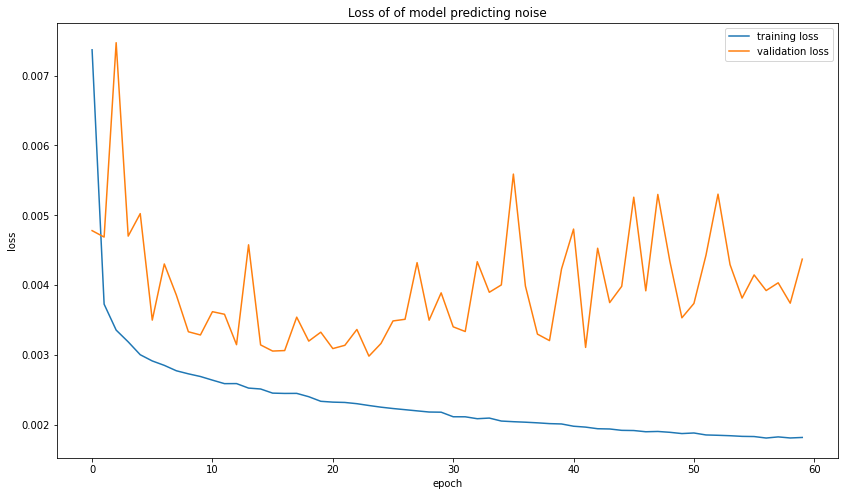

In [ ]:
loss=training_loss 
val_loss=validation_loss
plt.figure(figsize=(14, 8))
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.plot(loss)
plt.plot(val_loss)
plt.title('Loss graph of UNet Autoencoder model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc='upper right')

plt.show()